Working folder files: ['scrambled.npy']
Loaded array shape: (200, 50) dtype: float64 total elements: 10000
Using matrix shape: (100, 100)


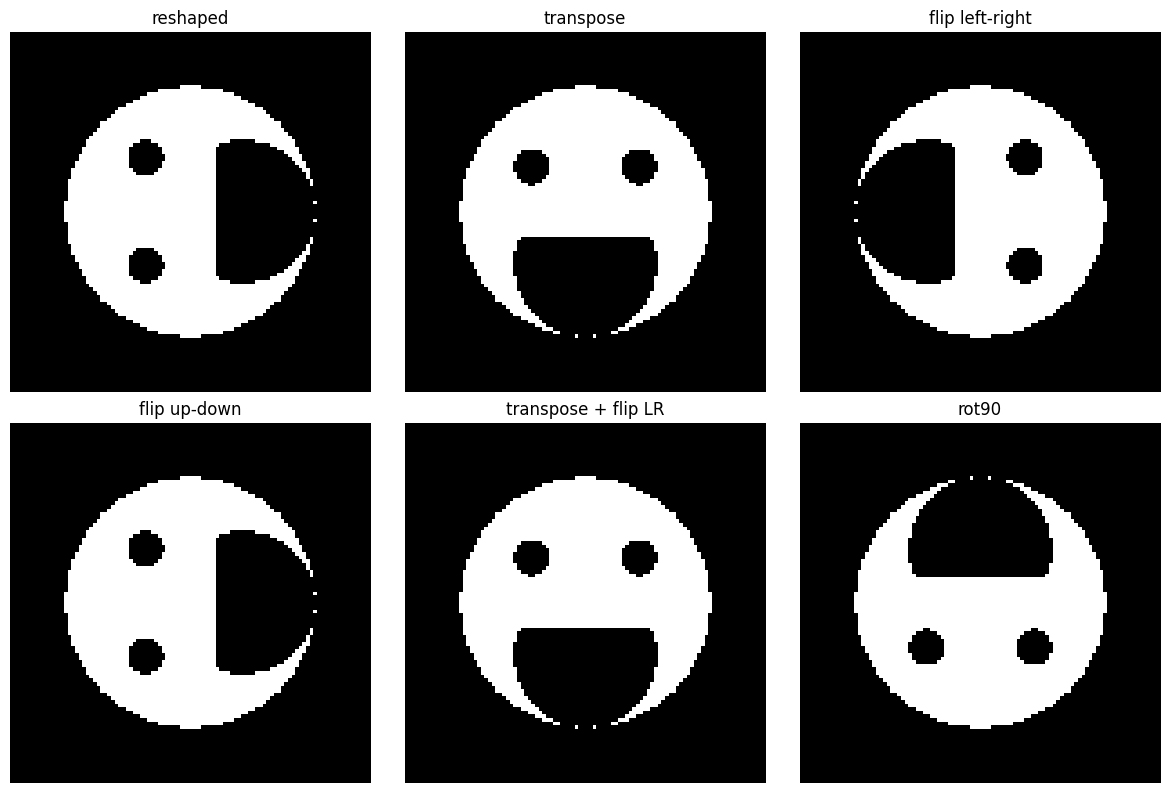

In [3]:
# Cell 1 - set filename (change if needed)
fname = "scrambled.npy"  # replace with your actual filename, e.g., "scrambled.txt"

# load and display variants
import numpy as np
import matplotlib.pyplot as plt
import math
import os

print("Working folder files:", os.listdir('.'))

# Load file (supports .npy, .txt, .csv)
if fname.lower().endswith('.npy'):
    arr = np.load(fname)
else:
    try:
        arr = np.loadtxt(fname, delimiter=',')
    except Exception:
        arr = np.genfromtxt(fname, delimiter=',')

print('Loaded array shape:', arr.shape, 'dtype:', arr.dtype, 'total elements:', arr.size)

# Reshape to square if possible
if arr.ndim == 1:
    total = arr.size
    n = int(math.isqrt(total))
    if n * n != total:
        raise ValueError(f"Length {total} is not a perfect square — can't auto-reshape into square.")
    mat = arr.reshape(n, n)
elif arr.ndim == 2:
    if arr.shape[0] == arr.shape[1]:
        mat = arr
    else:
        total = arr.size
        n = int(math.isqrt(total))
        if n * n == total:
            mat = arr.flatten().reshape(n, n)
        else:
            raise ValueError(f"2D array shape {arr.shape} and total {total} can't be auto-made square.")
else:
    total = arr.size
    n = int(math.isqrt(total))
    if n * n != total:
        raise ValueError(f"Array with {total} elements can't be reshaped to square automatically.")
    mat = arr.flatten().reshape(n,n)

print("Using matrix shape:", mat.shape)

# create variants to try (transpose/flip/rotate)
variants = [
    (mat, 'reshaped'),
    (mat.T, 'transpose'),
    (np.fliplr(mat), 'flip left-right'),
    (np.flipud(mat), 'flip up-down'),
    (np.fliplr(mat.T), 'transpose + flip LR'),
    (np.rot90(mat, k=1), 'rot90')
]

# show a 2x3 grid of possibilities
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for ax, (var, title) in zip(axes, variants):
    ax.imshow(var, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()


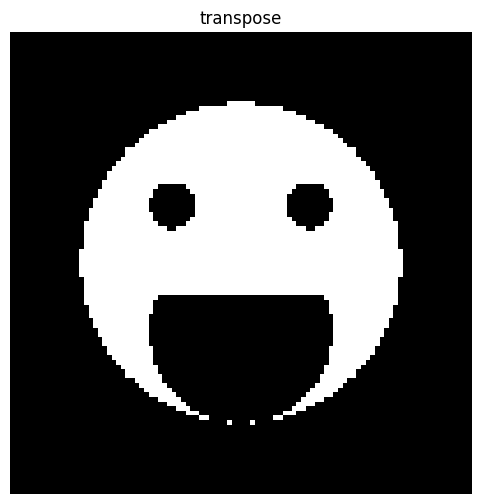

In [4]:
# show single variant larger (0..5)
index = 1   # change to the index (0..5) that looked right
variant, title = variants[index]
plt.figure(figsize=(6,6))
plt.imshow(variant, cmap='gray')
plt.title(title)
plt.axis('off')
plt.show()



In [5]:
plt.imsave("decoded_image.png", variant, cmap='gray')
print("Saved decoded_image.png in current folder.")


Saved decoded_image.png in current folder.
